In [4]:
from src.processing_data import processing_all_data, create_folders
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
plt.style.use('properties.mplstyle')
import numpy as np
import matplotlib as mpl
from IPython.display import clear_output 
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # opcional
    "axes.unicode_minus": False,              # para "-" correto em LaTeX
})

In [6]:
results_folder = "../../Results/"
properties_folder = results_folder + "properties/"
shortest_path  = properties_folder + "shoretest_path/"
assortativity_path = properties_folder + "assortativity/"
lst_create_all = [results_folder, properties_folder, shortest_path, assortativity_path]
for folders in lst_create_all:
    create_folders(folders)

Directory '../../Results/' ensured to exist.
Directory '../../Results/properties/' ensured to exist.
Directory '../../Results/properties/shoretest_path/' ensured to exist.
Directory '../../Results/properties/assortativity/' ensured to exist.


In [5]:
# processing_data
processing_all_data("../../data")
clear_output()

In [7]:
df = pd.read_csv("../../data/all_data.csv", sep=',')
df

,N,m0,dim,alpha_a,alpha_g,N_samples,Short_Cost_mean,Short_Cost_error,Short_BFS_mean,Short_BFS_error,R_Spearman_mean,R_Spearman_error,R_Newman_mean,R_Newman_error,ClusterCoefficient_mean,ClusterCoefficient_error
0,131072,2,1,0.0,2.0,11,6.156176,0.050776,5.995403,0.010487,0.286269,0.001646,-0.019361,0.002061,0.000598,0.000032
1,131072,2,1,1.0,2.0,11,2.741658,0.006697,6.678534,0.017627,0.306807,0.001629,-0.020456,0.003120,0.027528,0.000129
2,131072,2,1,2.0,1.0,112,31.749291,2.256164,9.897085,0.023250,0.419327,0.000416,0.106054,0.000944,0.375039,0.000124
3,131072,2,1,2.0,2.0,11,2.702028,0.010433,10.005388,0.026806,0.420642,0.001353,0.109811,0.002896,0.377341,0.000333
4,131072,2,1,2.0,3.0,11,1.872412,0.027835,10.264545,0.048833,0.421176,0.001241,0.109157,0.002793,0.377025,0.000323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,8192,2,4,5.0,2.0,601,4.525885,0.005537,5.668771,0.002199,0.338269,0.000785,-0.023159,0.000962,0.102881,0.000143
428,8192,2,4,6.0,2.0,601,4.478837,0.004030,6.088345,0.002276,0.369767,0.000782,0.016742,0.001018,0.155675,0.000171
429,8192,2,4,7.0,2.0,601,4.466564,0.003422,6.437145,0.002490,0.392480,0.000778,0.051483,0.001087,0.201056,0.000180
430,8192,2,4,8.0,2.0,602,4.474553,0.004607,6.711514,0.002655,0.407676,0.000766,0.078236,0.001125,0.233656,0.000190


## SHOREST PATH (DIJSTRIKA) -- $\alpha_A$

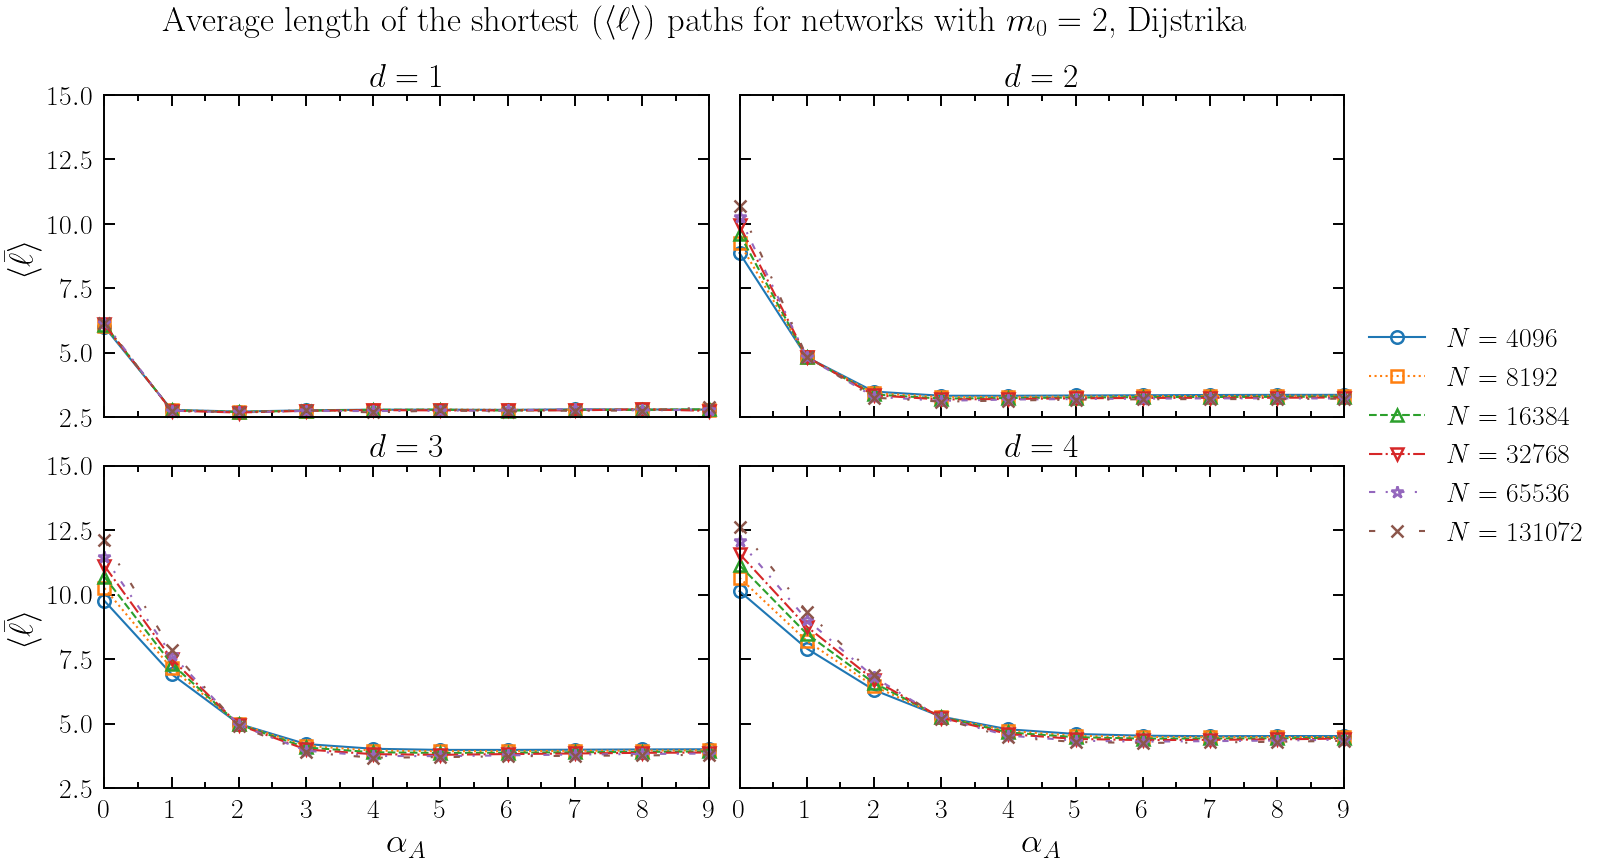

In [21]:
fig, axes = plt.subplots(2,2, figsize=(16,9), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["Short_Cost_mean"],
                marker=markers[idx_n],ls=ls[idx_n],ms=ms, mew=mew ,color=colors[idx_n],
                clip_on=False)
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(2.5, 15)

# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
fig.suptitle(fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, Dijstrika", fontsize=25, fontweight='bold') # Adds a title to the entire figure
plt.savefig(shortest_path + "shortest_dijstrika_alpha_a.pdf")
plt.show()

## SHOREST PATH (DIJSTRIKA) -- $\alpha_G$

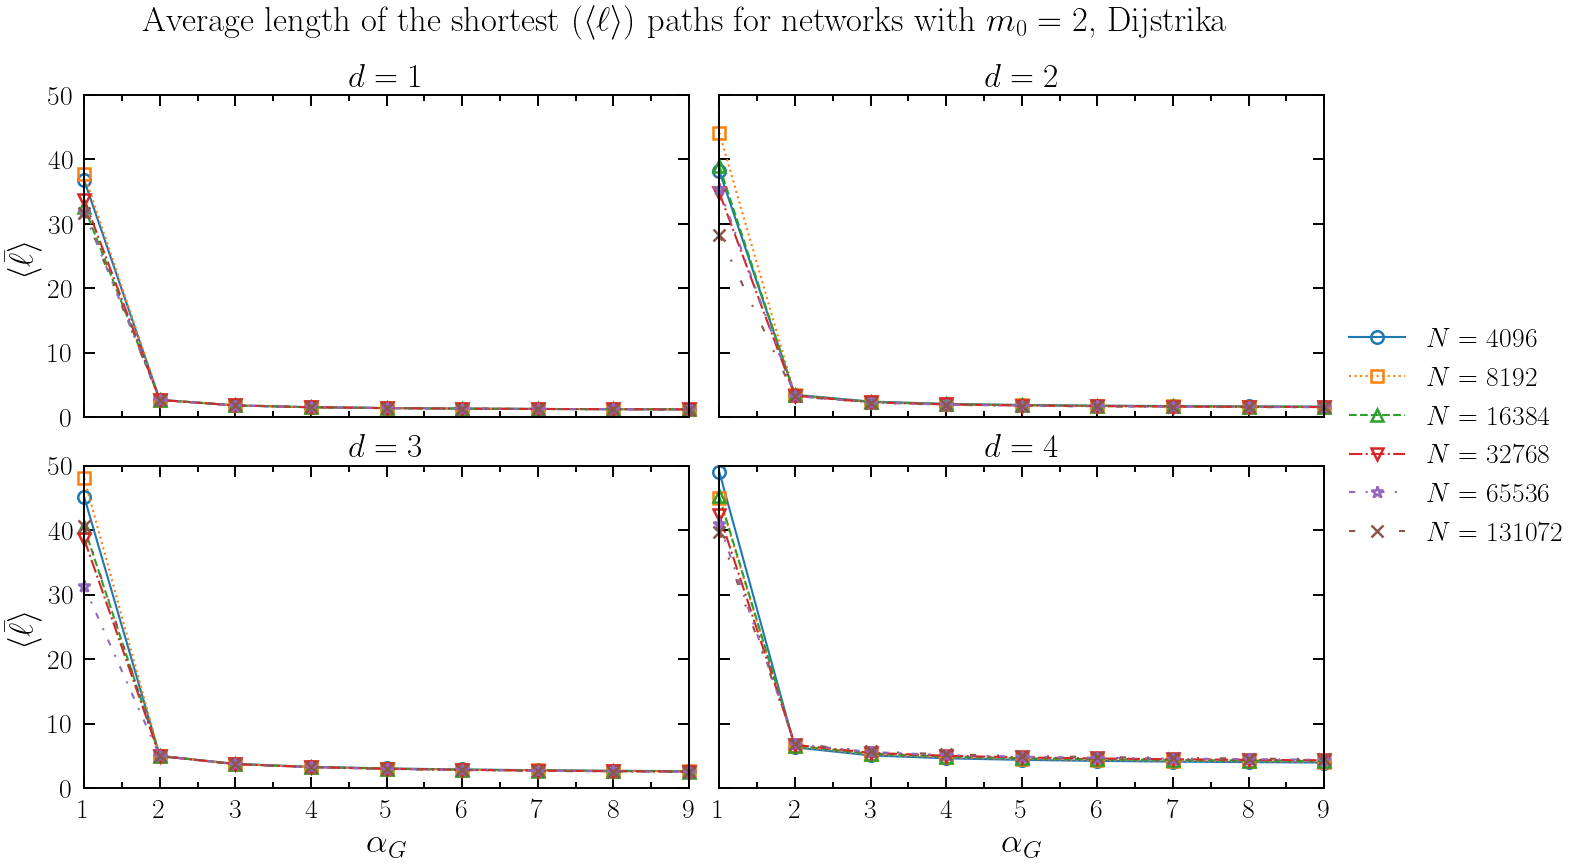

In [23]:
fig, axes = plt.subplots(2,2, figsize=(16,9), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_a"]==alpha_ag_f)].sort_values("alpha_g")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_g"], df_N["Short_Cost_mean"],
                marker=markers[idx_n],ls=ls[idx_n], ms=ms, mew=mew,
                color=colors[idx_n], clip_on=False)
    
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')
    ax.set_ylim(0,50)
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.90, 0.5))
fig.suptitle(fr"Average length of the shortest ($\langle \ell \rangle$) paths for networks with $m_0 = {m0}$, Dijstrika", fontsize=25, fontweight='bold') # Adds a title to the entire figure
plt.savefig(shortest_path + "shortest_dijstrika_alpha_g.pdf")
plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_A$

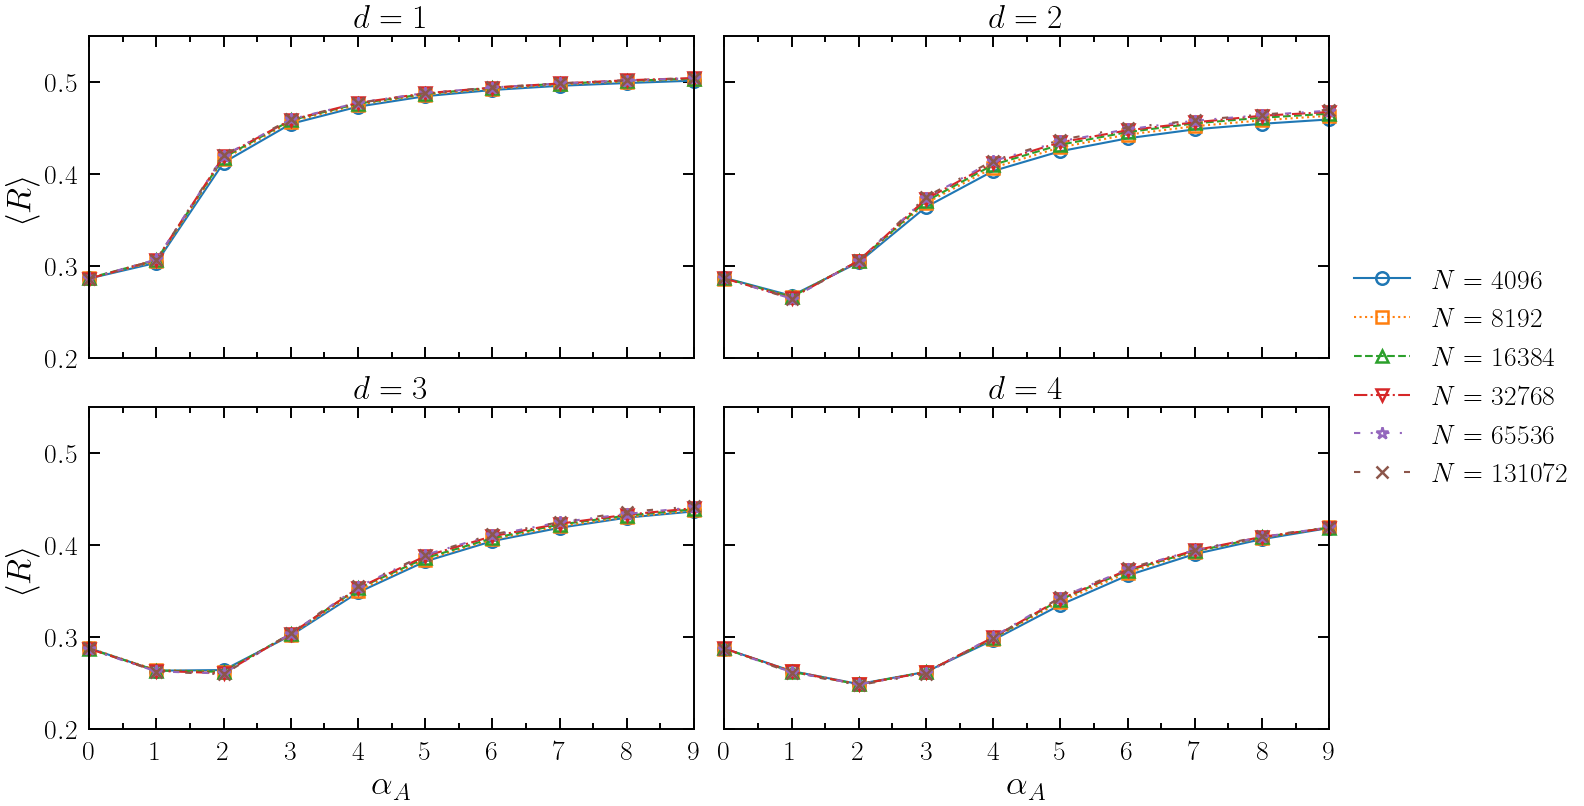

In [31]:
fig, axes = plt.subplots(2,2, figsize=(16,9), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["R_Spearman_mean"],
                marker=markers[idx_n],ls=ls[idx_n], ms=ms, mew=mew, color=colors[idx_n],
                clip_on=False)
    
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')
    ax.set_ylim(0.20, 0.55)

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_G$

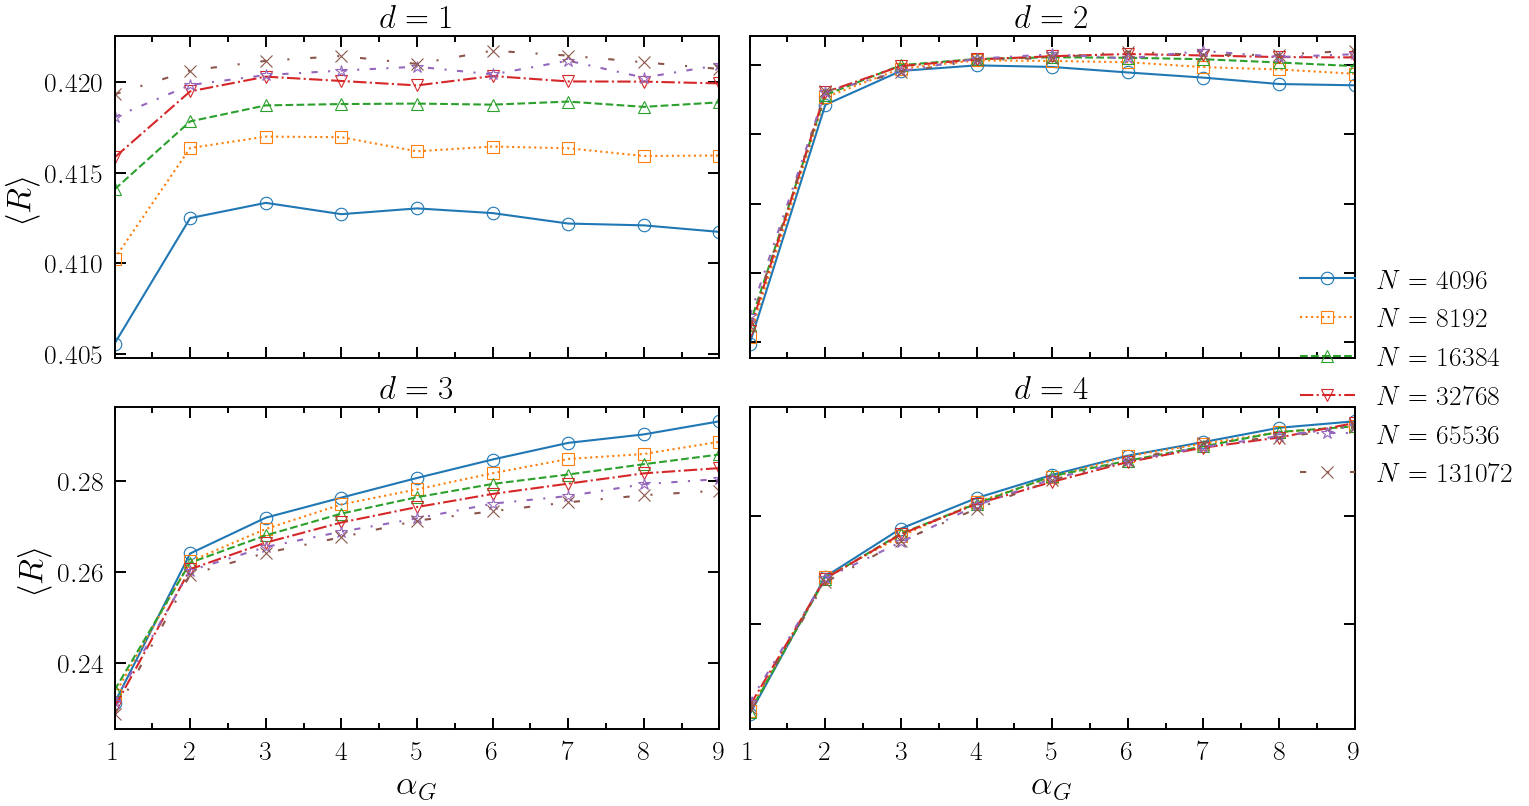

In [13]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
N = [2**i for i in range(12, 18)]
m0 = 2
alpha_ag_f = 2.0

dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8
fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_a"]==alpha_ag_f)].sort_values("alpha_g")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_g"], df_N["R_Spearman_mean"],marker=markers[idx_n],ls=ls[idx_n], color=colors[idx_n])
    
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()

## SHOREST PATH (Bfs) -- $\alpha_A$

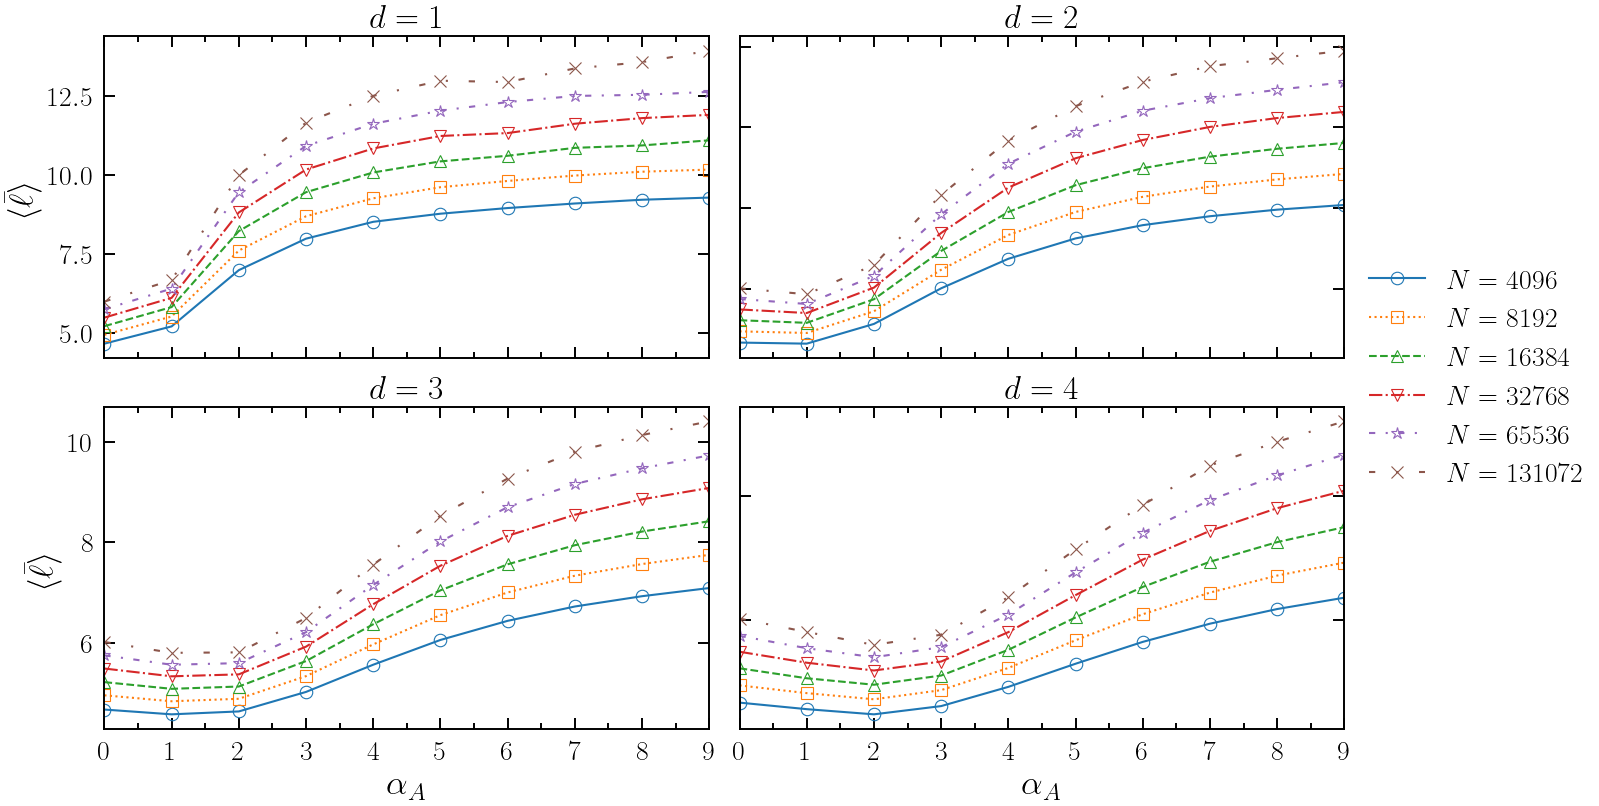

In [25]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["Short_BFS_mean"], marker=markers[idx_n],ls=ls[idx_n], color=colors[idx_n])
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')

# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
plt.show()

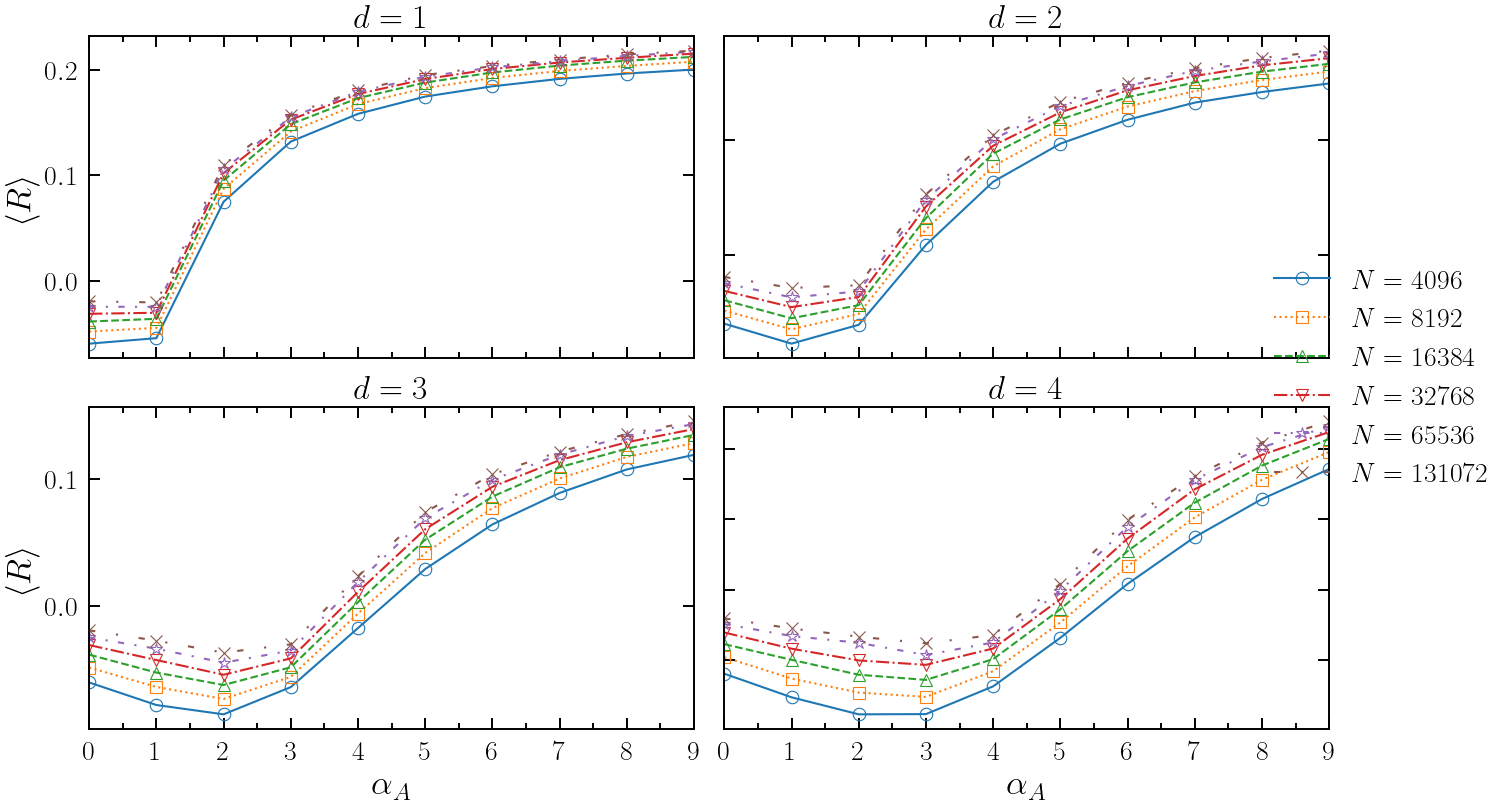

In [31]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25

N = [2**i for i in range(12, 18)]
dim = [1,2,3,4]
m0 = 2
alpha_ag_f = 2.0

labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    df_filter = df[(df["m0"]==m0) & (df["alpha_g"]==alpha_ag_f)].sort_values("alpha_a")
    for idx_n,n in enumerate(N):
        df_N = df_filter[(df_filter["N"]==n) & (df_filter["dim"]==dim[idx])]
        ax.plot(df_N["alpha_a"], df_N["R_Newman_mean"],marker=markers[idx_n],ls=ls[idx_n], color=colors[idx_n])
    
    
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()